# Лабораторная работа №3 - Генерирование случайных величин с заданным законом распределения

### Вариант 14

Составить подпрограмму генерирования случайных величин в соответствии с вариантом задания 14:

$F(x) = \begin{cases} \sqrt{x}, & x \in [0; 0,25) \\ 0,25x + 0,4375, & x \in [0,25; 2,25] \end{cases}$

По полученной с помощью подпрограммы выборке:
* Построить гистограмму частот;
* Статистическая функция распределения;
* Оценить матожидание случайной величины;
* Оценить дисперсию случайной величины;
* Проверить соответствие эмперических данных теоретическому распределению проверить с помощью критерия Пирсона или Колмогорова.

Объем выборки - не менее 1000.
Количество интервалов разбиения - $k = 15$ или $k = 25$.

Способ построения - метод обратных функций.

In [2]:
import math
import random

import numpy as np
import scipy.stats as sp
import pandas as pd
import matplotlib.pyplot as plt; plt.rcParams['figure.figsize'] = [12, 6]
import matplotlib; matplotlib.style.use('ggplot')

In [3]:
n = 3000   # Объем выборки
k = 25     # Интервалов разбиения

С помощью метода обратных функций получили обратные функции:

$F^{-1}(y) = \begin{cases} y^2, & y \in [0; 0,5) \\ 4y - 1,75, & y \in [0,5; 1) \end{cases}$

In [4]:
class Generator_with_Given_Law:
    def __init__(self, n):
        self.n = n

    def generate(self):
        y = random.random()

        if 0 < y < 0.5:
            return y**2
        elif 0.5 <= y < 1:
            return 4 * y - 1.75
        else:
            raise Exception("Generated value out of range of (0, 1)")

In [5]:
generator = Generator_with_Given_Law(n)
distribution_list = [generator.generate() for _ in range(n)]

sample = pd.Series(distribution_list, name='value')
distribution = pd.DataFrame(sample)
distribution['cdf'] = distribution.rank(method='average', pct=True)

In [6]:
def generate_theoretical_distribution(y):
    if 0 <= y < 0.25:
        return math.sqrt(y)
    elif 0.25 <= y <= 2.25:
        return 0.25 * y + 0.4375
    else:
        raise Exception("Generated value out of range of [0, 2.25]") 

def generate_theoretical_density(y):
    if 0 < y < 0.25:
        return 1 / (2 * math.sqrt(y))
    elif 0.25 < y < 2.25:
        return 0.25


theoretical_distribution_list = [generate_theoretical_distribution((i * 2.25) / n) for i in range(n)]
theoretical_distribution = pd.Series(theoretical_distribution_list, index=np.arange(0, 2.25, 2.25 / n))

theoretical_density_list = [generate_theoretical_density((i * 2.25) / n) for i in range(n)]
theoretical_density = pd.Series(theoretical_density_list, index=np.arange(0, 2.25, 2.25 / n))

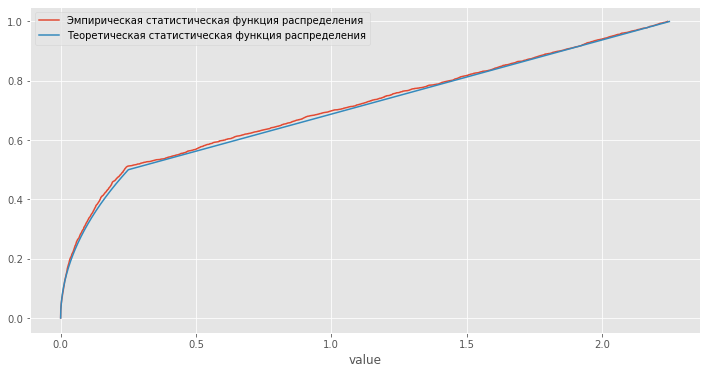

In [7]:
distribution.sort_values('value').plot(x='value', y='cdf', label="Эмпирическая статистическая функция распределения")
theoretical_distribution.plot(label="Теоретическая статистическая функция распределения")
plt.legend(loc="upper left")

(0.0, 5.0)

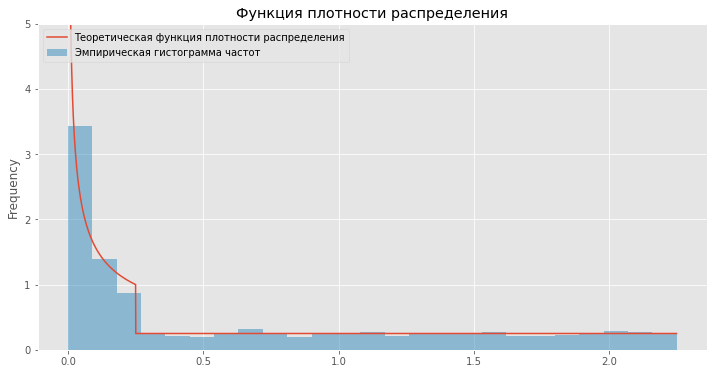

In [182]:
theoretical_density.plot(title="Функция плотности распределения", label="Теоретическая функция плотности распределения")
distribution.value.plot.hist(bins=k, alpha=0.5, density=True, label="Эмпирическая гистограмма частот")
plt.legend(loc="upper left")
plt.ylim(0, 5)

In [183]:
print(f"Математическое ожидание: μ = {distribution.value.mean()}")

Математическое ожидание: μ = 0.6610433890930284


In [184]:
print(f"Дисперсия: σ² = {distribution.value.var()}")

Дисперсия: σ² = 0.5130675488216287


In [185]:
λ, p = sp.ks_2samp(np.histogram(distribution.value, bins=k)[0], np.histogram(theoretical_distribution, bins=k)[0])

print(f"""
λ = {λ}
""")


λ = 0.48

